## Лабораторная работа 4.3.6
# Саморепродукция

In [4]:
import numpy as np
import scipy as ps
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline

## А. Исследование двумерных решеток

### Определение периода решеток по их пространственному спектру

Для каждой сетки определим расстояние x между соседними дифракционными максимумами на экране:

In [47]:
data = pd.read_excel('lab-436.xlsx', 'table1')
pd.DataFrame(data)

,№,X,m,"X/m, мм"
0,1,163,6,27.166667
1,2,108,6,18.000000
2,3,45,5,9.000000
3,4,22,5,4.400000
4,5,14,4,3.500000


Расстояние от касеты до экрана – L, длина волны лазера – $\lambda$.

In [48]:
# в мм:
L = 10**(3)
Lambda = 532 * 10**(-6)

Используем формулу $d = \dfrac{\lambda L}{x}$, где $x$ – расстояние между соседними максимумами.

In [66]:
d_method1 = list()
for i in range(len(data)):
    d_method1.append(L * Lambda / data.values[i, 3])
pd.DataFrame(d_method1, columns=['$d$, мм'], index=range(1, 6))

,"$d$, мм"
1,0.019583
2,0.029556
3,0.059111
4,0.120909
5,0.152000


### Определение периода решеток с помощью линзы

Определим размеры клеток, полученных с помощью линзы, на экране (рассматриваем геометрическое
изображение решётки) ($D$). Расстояние от линзы до сетки $a$, от линзы до экрана $b$, тогда период сетки
считается по формуле $d = D \dfrac{a}{b}$.

In [73]:
data4 = pd.read_excel('lab-436.xlsx', 'table4')
d_method2 = []
for i in range(len(data4)):
    d_method2.append(data4.values[i, 0])
pd.DataFrame(d_method2, index = range(1, 6), columns = ['d, мм'])

,"d, мм"
1,0.01270
2,0.02549
3,0.04961
4,0.11804
5,0.15980


### Исследование эффекта саморепродукции с помощью сеток

Получим на экране геометрическое изображение сетки. Перемещая линзу с помощью микровинта, определим координаты $z_n$ плоскостей саморепродукции, соответствующих четкому изображению сетки на экране.

In [11]:
data2 = pd.read_excel('lab-436.xlsx', 'table2')
pd.DataFrame(data2)

,z_0,z_1,z_2,z_3,z_4,z_5,z_6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58.0,52.0,50.0,48.0,46.0,44.0,42.0
2,58.0,50.0,44.0,37.0,29.0,19.0,NaN
3,58.0,45.0,38.0,17.0,NaN,NaN,NaN
4,58.0,35.0,8.0,NaN,NaN,NaN,NaN


Построим график $z_n = f(n)$, по коэффициенту наклона графика $k$ определим период решетки: $d = \sqrt{\dfrac{k\lambda}{2}}$.

In [34]:
def plot_set(x, y):    
    
    new_x = []
    new_y = []

    for index in range(len(y)):
        x_part = []
        y_part = []
        for old_x, old_y in zip(x[index], y[index]):
            if not (math.isnan(old_x) or math.isnan(old_y)):
                x_part.append(old_x)
                y_part.append(old_y)
        if y_part:
            new_x.append(x_part)
            new_y.append(y_part)

    k = [0 for _ in range(len(new_y))]
    b = [0 for _ in range(len(new_x))]

    for i in range(len(new_y)):
        k[i], b[i] = np.polyfit(new_x[i], new_y[i], deg=1)
 
    plt.figure(figsize=(14, 8))
    
    for i in range(len(new_y)):
        new_x[i] = np.array(new_x[i], dtype=float)
        new_y[i] = np.array(new_y[i], dtype=float)
        plt.subplot(2, 2, i + 1)
        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
        
        plt.title(i + 1)
        plt.xlabel('n')
        plt.ylabel('$z_n$')
        plt.scatter(new_x[i], new_y[i])
        plt.plot(new_x[i], k[i] * new_x[i] + b[i])

    plt.legend()
    plt.show()
    
    return k

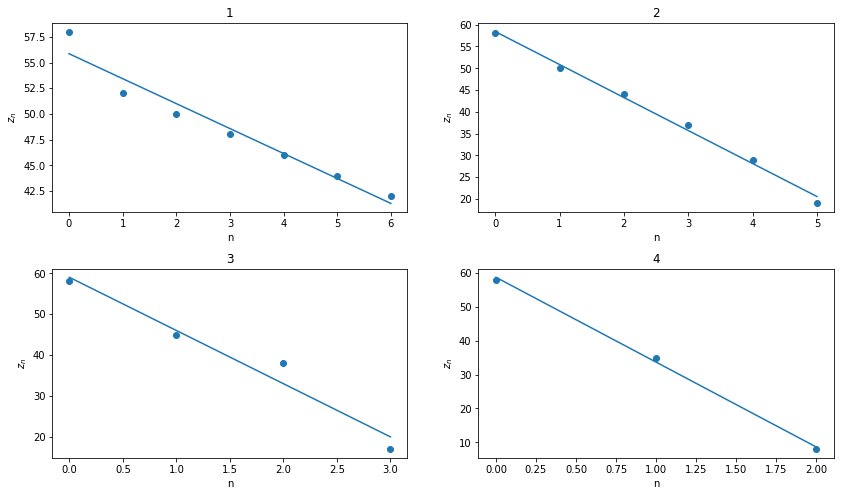

In [35]:
y = []
x = []
for i in range(5):
    y.append(data2.values[i, :].tolist())
    x.append(list(range(7)))

k1 = plot_set(x, y)

In [36]:
def print_k(k):
    for i in range(len(k)):
        print('k[', i + 1, '] = ', k[i], sep='')

print_k(k1)

k[1] = -2.42857142857
k[2] = -7.57142857143
k[3] = -13.0
k[4] = -25.0


Определим значения периодов решеток, используя найденные коэффициенты.

In [75]:
d_method3 = []
for i in range(len(k1)):
    d_method3.append(((-1) * k1[i] * Lambda / 2)**0.5)
pd.DataFrame(d_method3, columns=['$d$, мм'], index=range(1, 5))

,"$d$, мм"
1,0.025417
2,0.044878
3,0.058805
4,0.081548


Сведем результаты измерения решеток тремя способами в единую таблицу.

In [76]:
d_list = []
d_list.append(d_method1)
d_list.append(d_method2)
d_method3.insert(0, 'NaN')
d_list.append(d_method3)
pd.DataFrame(d_list, index=['спектр', 'линза', "саморепродукция"], columns=[0, 1, 2, 3, 4])

,0,1,2,3,4
спектр,0.0195828,0.029556,0.059111,0.120909,0.152000
линза,0.0127,0.025490,0.049610,0.118040,0.159800
саморепродукция,NaN,0.025417,0.044878,0.058805,0.081548


Результаты совпали по порядку величины.

# Б.  Исследование решеток миры

Перемещая линзу с помощью микрометрического винта, определим по нониусной шкале координату плоскости, соответствующей изображению миры на экране по законам геометрической оптики, и координаты плоскостей саморепродукции.

### Определение периода решеток с помощью саморепродукции

In [39]:
data3 = pd.read_excel('lab-436.xlsx', 'table3')
data3.head(len(data))

,z_n (№25),z_n (№20)
0,78,78
1,60,73
2,46,56


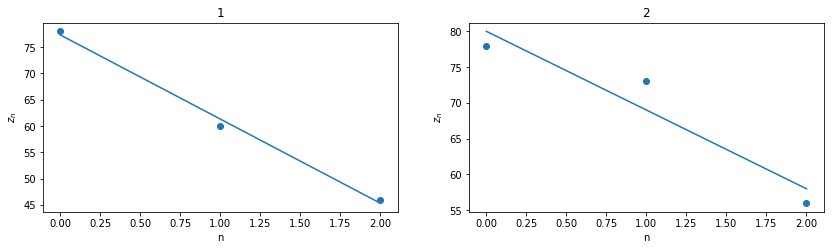

In [40]:
y = []
x = []
for i in range(2):
    y.append(data3.values[:, i].tolist())
    x.append(list(range(3)))
    
k2 = plot_set(x, y)

In [41]:
print_k(k2)

k[1] = -16.0
k[2] = -11.0


In [42]:
d_method4 = []
for i in range(len(k2)):
    d_method4.append(((-1) * k2[i] * Lambda / 2)**0.5)
pd.DataFrame(d_method4, columns=['$d$, мм'], index=['№25', '№20'])

,"$d$, мм"
№25,0.065238
№20,0.054093


### Определение периода решеток по пространственному спектру

In [43]:
d_25 = Lambda * 126 / (16 / 18)
d_20 = Lambda * 126 / (16 / 14)
d_method5 = list()
d_method5.append(d_25), d_method5.append(d_20)
pd.DataFrame(d_method5, columns=['$d$, мм'], index=['№25', '№20'])

,"$d$, мм"
№25,0.075411
№20,0.058653


### Определение периода решеток с помощью линзы

In [44]:
d_25 = 1.043 * (15 / 236)
d_20 = 1.107 * (12 / 233)
d_method6 = list()
d_method6.append(d_25), d_method6.append(d_20)
pd.DataFrame(d_method6, columns=['$d$, мм'], index=['№25', '№20'])

,"$d$, мм"
№25,0.066292
№20,0.057013


Сведем результаты измерения решеток миры тремя способами в одну таблицу.

In [45]:
d_list = []
d_list.append(d_method4)
d_list.append(d_method5)
d_list.append(d_method6)
pd.DataFrame(d_list, index=['саморепродукция', 'спектр', 'линза'], columns=['№25', '№20'])

,№25,№20
саморепродукция,0.065238,0.054093
спектр,0.075411,0.058653
линза,0.066292,0.057013


Результаты совпали по порядку величины.